<a href="https://colab.research.google.com/github/kingajutrzenka/Data-Science/blob/main/case_study_gie%C5%82da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study dane giełdowe**

1. Import bibliotek
2. Załadowanie danych
3. Eksploracja danych
4. Selekcja kolumn
5. Selekcja wierszy
6. Obliczanie nowych kolumn
7. Filtrowanie danych

In [106]:
import numpy as np
import pandas as pd

In [107]:
# pobranie danych
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2025-07-14 to 2020-07-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1254 non-null   float64
 1   High    1254 non-null   float64
 2   Low     1254 non-null   float64
 3   Close   1254 non-null   float64
 4   Volume  1254 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [108]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-14,225.0700,226.6600,224.2400,225.6900,35702597
2025-07-11,223.5800,226.6799,222.3700,225.0200,50518307
2025-07-10,221.5500,222.7900,219.7000,222.2600,30370591
2025-07-09,221.0700,224.2900,220.4700,222.5400,38155121
2025-07-08,223.9150,224.0000,218.4300,219.3600,45691987
...,...,...,...,...,...
2020-07-22,156.2500,157.5000,153.2630,154.9960,82084500
2020-07-21,161.6240,162.0290,155.2860,156.9140,122699300
2020-07-20,150.0100,160.0680,149.7010,159.8420,151963520


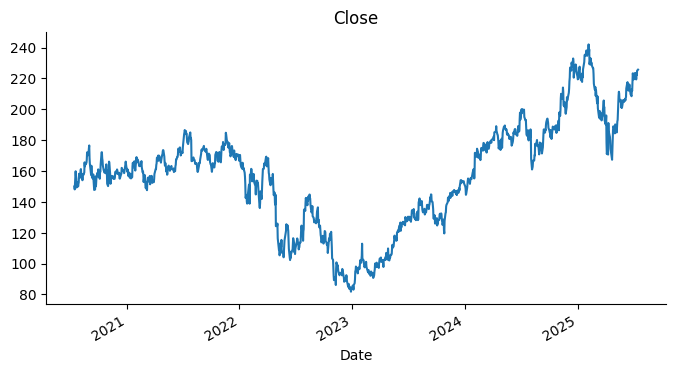

In [109]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [110]:
df.head() #5 pierwszych wierszy, ale może być ile chcemy (liczba)

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-14,225.0700,226.6600,224.2400,225.6900,35702597
2025-07-11,223.5800,226.6799,222.3700,225.0200,50518307
2025-07-10,221.5500,222.7900,219.7000,222.2600,30370591
2025-07-09,221.0700,224.2900,220.4700,222.5400,38155121
2025-07-08,223.9150,224.0000,218.4300,219.3600,45691987


In [111]:
df.columns #nazwy kolumn

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [112]:
df.columns = [col.lower() for col in df.columns] # zmienia litery na małe
df.head()

,open,high,low,close,volume
Date,,,,,
2025-07-14,225.0700,226.6600,224.2400,225.6900,35702597
2025-07-11,223.5800,226.6799,222.3700,225.0200,50518307
2025-07-10,221.5500,222.7900,219.7000,222.2600,30370591
2025-07-09,221.0700,224.2900,220.4700,222.5400,38155121
2025-07-08,223.9150,224.0000,218.4300,219.3600,45691987


In [113]:
df.describe() #podstawowe statystyki

,open,high,low,close,volume
count,1254.0000,1254.0000,1254.0000,1254.0000,1254.0000
mean,156.9188,158.8195,154.8671,156.8765,62248393.8939
std,34.4982,34.6185,34.3002,34.4900,29383534.6840
min,82.8000,83.4800,81.4300,81.8200,15007497.0000
25%,131.9975,133.6000,130.4438,131.9325,42377390.2500
50%,160.4150,162.2210,158.5900,160.3185,55710047.0000
75%,178.0625,179.9825,176.1750,178.3300,73834637.5000
max,239.0150,242.5200,238.0300,242.0600,272661720.0000


In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1254.0000,156.9188,34.4982,82.8000,131.9975,160.4150,178.0625,239.0150
high,1254.0000,158.8195,34.6185,83.4800,133.6000,162.2210,179.9825,242.5200
low,1254.0000,154.8671,34.3002,81.4300,130.4438,158.5900,176.1750,238.0300
close,1254.0000,156.8765,34.4900,81.8200,131.9325,160.3185,178.3300,242.0600
volume,1254.0000,62248393.8939,29383534.6840,15007497.0000,42377390.2500,55710047.0000,73834637.5000,272661720.0000


**selekcja kolumn**

In [115]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2025-07-14,225.0700,226.6600,224.2400,225.6900,35702597
2025-07-11,223.5800,226.6799,222.3700,225.0200,50518307
2025-07-10,221.5500,222.7900,219.7000,222.2600,30370591
2025-07-09,221.0700,224.2900,220.4700,222.5400,38155121
2025-07-08,223.9150,224.0000,218.4300,219.3600,45691987
2025-07-07,223.0000,224.2900,222.3700,223.4700,36604139
2025-07-03,221.8200,224.0100,221.3600,223.4100,29632353
2025-07-02,219.7300,221.6000,219.0600,219.9200,30894178
2025-07-01,219.5000,221.8750,217.9300,220.4600,39256830


In [116]:
df[['open']]

,open
Date,
2025-07-14,225.0700
2025-07-11,223.5800
2025-07-10,221.5500
2025-07-09,221.0700
2025-07-08,223.9150
2025-07-07,223.0000
2025-07-03,221.8200
2025-07-02,219.7300
2025-07-01,219.5000


In [117]:
a = df.iloc[:, 0]
a.describe().T

,open
count,10.0000
mean,222.2755
std,1.8452
min,219.5000
25%,221.1900
50%,222.4100
75%,223.5650
max,225.0700


In [118]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2025-07-14,225.0700,225.6900
2025-07-11,223.5800,225.0200
2025-07-10,221.5500,222.2600
2025-07-09,221.0700,222.5400
2025-07-08,223.9150,219.3600
2025-07-07,223.0000,223.4700
2025-07-03,221.8200,223.4100
2025-07-02,219.7300,219.9200
2025-07-01,219.5000,220.4600


In [119]:
df.iloc[:, 2:5] # od 3 do 5 kolumny

,low,close,volume
Date,,,
2025-07-14,224.2400,225.6900,35702597
2025-07-11,222.3700,225.0200,50518307
2025-07-10,219.7000,222.2600,30370591
2025-07-09,220.4700,222.5400,38155121
2025-07-08,218.4300,219.3600,45691987
2025-07-07,222.3700,223.4700,36604139
2025-07-03,221.3600,223.4100,29632353
2025-07-02,219.0600,219.9200,30894178
2025-07-01,217.9300,220.4600,39256830


In [120]:
df.iloc[:, [-1]]
"""ostatnia kolumna
tu by otrzymać DataFrame paujemy tylko -1
a tylko DataFrame daje wykresy"""

'ostatnia kolumna\ntu by otrzymać\xa0DataFrame paujemy tylko -1\na tylko DataFrame daje wykresy'

In [121]:
df.iloc[0] #pierwszy wiersz

,2025-07-14
open,225.0700
high,226.6600
low,224.2400
close,225.6900
volume,35702597.0000


In [122]:
df.iloc[:3] #pierwsze trzy wiersze

,open,high,low,close,volume
Date,,,,,
2025-07-14,225.0700,226.6600,224.2400,225.6900,35702597
2025-07-11,223.5800,226.6799,222.3700,225.0200,50518307
2025-07-10,221.5500,222.7900,219.7000,222.2600,30370591


In [123]:
#obliczanie nowych kolumn
#importujemy NOWE dane
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2025-07-14 to 2020-07-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1254 non-null   float64
 1   High    1254 non-null   float64
 2   Low     1254 non-null   float64
 3   Close   1254 non-null   float64
 4   Volume  1254 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [124]:
df.head(10).T

Date,2025-07-14,2025-07-11,2025-07-10,2025-07-09,2025-07-08,2025-07-07,2025-07-03,2025-07-02,2025-07-01,2025-06-30
Open,95.3000,96.1250,96.0700,97.5000,96.8900,93.8800,92.6300,91.8800,92.8500,91.6850
High,95.4800,96.8350,97.4500,97.7150,97.6000,97.1200,94.1100,94.1000,93.2400,93.3850
Low,93.5600,95.2700,95.1200,96.1000,95.1100,93.5400,92.6100,91.5500,90.3100,91.5200
Close,93.8900,95.3900,96.4000,96.6400,97.4800,96.6800,93.6300,92.0500,92.1300,93.3000
Volume,14300220.0000,12453518.0000,15650890.0000,14858918.0000,20586820.0000,29817173.0000,8112562.0000,13603968.0000,17124009.0000,16155270.0000


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1254.0000,50.0957,18.2842,20.3700,34.0875,46.5000,66.0075,97.5000
High,1254.0000,50.9872,18.4629,21.1255,34.7538,47.4450,67.1988,97.7150
Low,1254.0000,49.2058,18.0666,19.8950,33.2825,45.8550,65.0025,96.1000
Close,1254.0000,50.1076,18.2764,20.4600,34.0600,46.5300,65.9925,97.4800
Volume,1254.0000,23783622.2743,16301399.9127,5200356.0000,15570872.5000,20119213.0000,27712245.0000,364261230.0000


Dane z **df.head()** to dane ogólne przepisane do dat, a **df.describe()** tworzy średnie, mediany itp.

In [126]:
df['Average'] = (df['Open'] + df['Close']) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2025-07-14,95.3000,95.4800,93.5600,93.8900,14300220,94.5950
2025-07-11,96.1250,96.8350,95.2700,95.3900,12453518,95.7575
2025-07-10,96.0700,97.4500,95.1200,96.4000,15650890,96.2350
2025-07-09,97.5000,97.7150,96.1000,96.6400,14858918,97.0700
2025-07-08,96.8900,97.6000,95.1100,97.4800,20586820,97.1850


In [127]:
df['Difference'] = (df['Close'] - df['Open'])
df.head()

,Open,High,Low,Close,Volume,Average,Difference
Date,,,,,,,
2025-07-14,95.3000,95.4800,93.5600,93.8900,14300220,94.5950,-1.4100
2025-07-11,96.1250,96.8350,95.2700,95.3900,12453518,95.7575,-0.7350
2025-07-10,96.0700,97.4500,95.1200,96.4000,15650890,96.2350,0.3300
2025-07-09,97.5000,97.7150,96.1000,96.6400,14858918,97.0700,-0.8600
2025-07-08,96.8900,97.6000,95.1100,97.4800,20586820,97.1850,0.5900


In [128]:
# zwiększona precyzja do {: .xf} miejsc po przecinku
pd.set_option('display.float_format', '{:.4f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1254.0000,50.0957,18.2842,20.3700,34.0875,46.5000,66.0075,97.5000
High,1254.0000,50.9872,18.4629,21.1255,34.7538,47.4450,67.1988,97.7150
Low,1254.0000,49.2058,18.0666,19.8950,33.2825,45.8550,65.0025,96.1000
Close,1254.0000,50.1076,18.2764,20.4600,34.0600,46.5300,65.9925,97.4800
Volume,1254.0000,23783622.2743,16301399.9127,5200356.0000,15570872.5000,20119213.0000,27712245.0000,364261230.0000
Average,1254.0000,50.1016,18.2702,20.7550,33.9913,46.4787,66.0312,97.1850
Difference,1254.0000,0.0118,1.2159,-6.7000,-0.6975,-0.0300,0.6800,7.6600


In [129]:
df = df.sort_index()
df.head()
# tu sortuje od najstarszych XD

,Open,High,Low,Close,Volume,Average,Difference
Date,,,,,,,
2020-07-16,32.0500,32.5900,31.5500,32.3500,11090750,32.2000,0.3000
2020-07-17,32.5800,32.8162,31.8500,32.5500,13667896,32.5650,-0.0300
2020-07-20,32.4800,33.9250,32.3500,33.6600,16213609,33.0700,1.1800
2020-07-21,34.1600,34.2300,32.5300,32.5500,16743293,33.3550,-1.6100
2020-07-22,32.4400,32.8800,32.3300,32.6600,12128382,32.5500,0.2200


In [130]:
#funkcja shift przesuwa dane o 1 (tyle ile w nawiasie) w dół
df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Difference
Date,,,,,,,
2020-07-16,32.0500,32.5900,31.5500,32.3500,11090750,32.2000,0.3000
2020-07-17,32.5800,32.8162,31.8500,32.5500,13667896,32.5650,-0.0300
2020-07-20,32.4800,33.9250,32.3500,33.6600,16213609,33.0700,1.1800
2020-07-21,34.1600,34.2300,32.5300,32.5500,16743293,33.3550,-1.6100
2020-07-22,32.4400,32.8800,32.3300,32.6600,12128382,32.5500,0.2200


In [131]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Difference,Close_shift
Date,,,,,,,,
2020-07-16,32.0500,32.5900,31.5500,32.3500,11090750,32.2000,0.3000,NaN
2020-07-17,32.5800,32.8162,31.8500,32.5500,13667896,32.5650,-0.0300,32.3500
2020-07-20,32.4800,33.9250,32.3500,33.6600,16213609,33.0700,1.1800,32.5500
2020-07-21,34.1600,34.2300,32.5300,32.5500,16743293,33.3550,-1.6100,33.6600
2020-07-22,32.4400,32.8800,32.3300,32.6600,12128382,32.5500,0.2200,32.5500


In [132]:
# dzienna stopa zwrotu w %
df['Daily_change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Difference,Close_shift,Daily_change
Date,,,,,,,,,
2020-07-16,32.0500,32.5900,31.5500,32.3500,11090750,32.2000,0.3000,NaN,NaN
2020-07-17,32.5800,32.8162,31.8500,32.5500,13667896,32.5650,-0.0300,32.3500,0.0062
2020-07-20,32.4800,33.9250,32.3500,33.6600,16213609,33.0700,1.1800,32.5500,0.0341
2020-07-21,34.1600,34.2300,32.5300,32.5500,16743293,33.3550,-1.6100,33.6600,-0.0330
2020-07-22,32.4400,32.8800,32.3300,32.6600,12128382,32.5500,0.2200,32.5500,0.0034


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1254.0000,50.0957,18.2842,20.3700,34.0875,46.5000,66.0075,97.5000
High,1254.0000,50.9872,18.4629,21.1255,34.7538,47.4450,67.1988,97.7150
Low,1254.0000,49.2058,18.0666,19.8950,33.2825,45.8550,65.0025,96.1000
Close,1254.0000,50.1076,18.2764,20.4600,34.0600,46.5300,65.9925,97.4800
Volume,1254.0000,23783622.2743,16301399.9127,5200356.0000,15570872.5000,20119213.0000,27712245.0000,364261230.0000
Average,1254.0000,50.1016,18.2702,20.7550,33.9913,46.4787,66.0312,97.1850
Difference,1254.0000,0.0118,1.2159,-6.7000,-0.6975,-0.0300,0.6800,7.6600
Close_shift,1253.0000,50.0726,18.2417,20.4600,34.0600,46.5100,65.9700,97.4800
Daily_change,1253.0000,0.0013,0.0299,-0.1158,-0.0164,0.0000,0.0179,0.1890


In [134]:
# wartości Daily Change
print(df.Daily_change.min())
print(df.Daily_change.max())

-0.11584196394322976
0.18902439024390238


<Axes: >

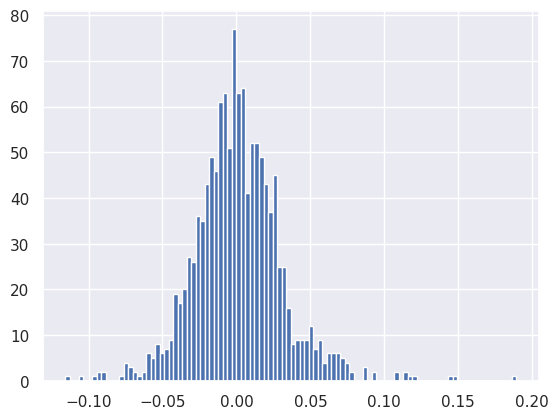

In [140]:
#histogram z seaborn
import seaborn as sns
sns.set()

df.Daily_change.hist(bins=100)

<Axes: xlabel='Date'>

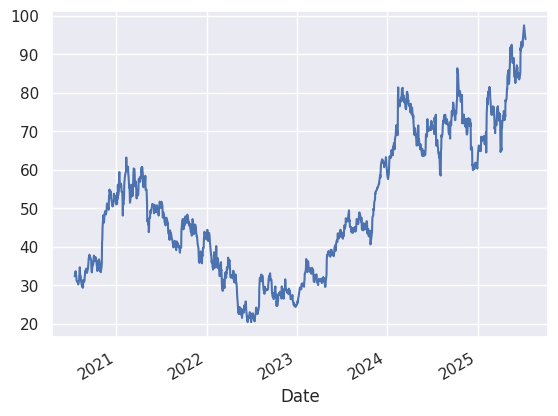

In [142]:
#wykres liniowy
df.Close.plot()